<h3>IMPORT LIBRARIES</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error

<h3>IMPORT DATASET</h3>

In [2]:
credit=pd.read_csv("C:/Users/HP/Documents/credit_card.csv")
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<h3>PRIMARY ANALYSIS</h3>

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


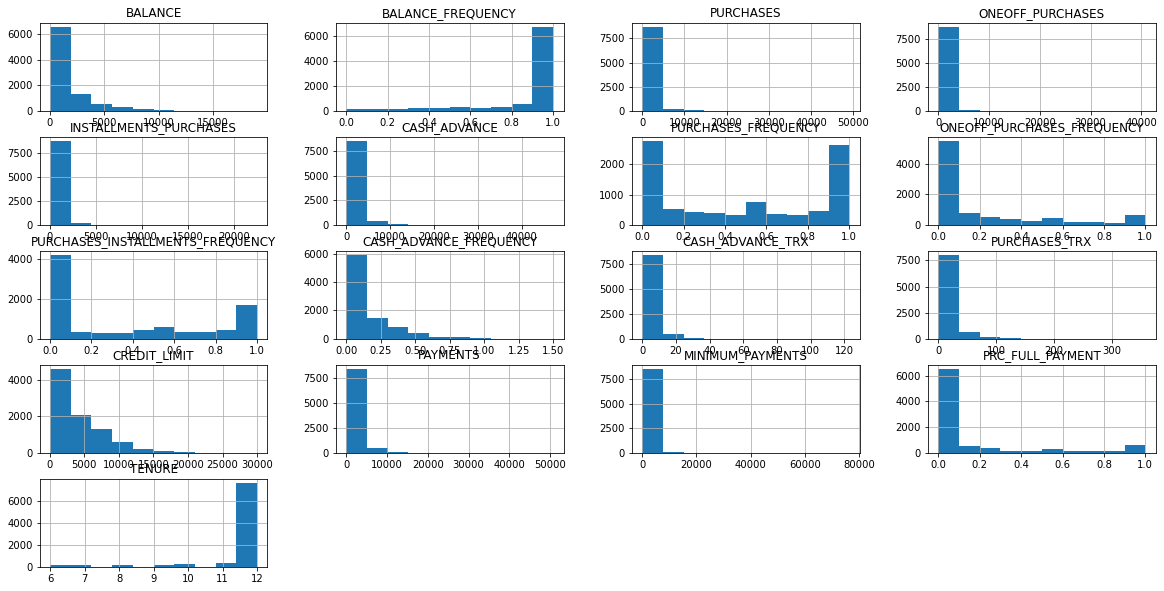

In [5]:
credit.hist(figsize=[20,10])
plt.show()

In [6]:
credit=credit.drop(['CUST_ID'], axis=1)

<h3>MISSING VALUES ANALYSIS</h3>

In [7]:
credit.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<h3>OUTLIER TREATMENT USING Z-SCORE METHOD</h3>

In [8]:
credit.CREDIT_LIMIT.fillna(credit.CREDIT_LIMIT.mean(),inplace=True)

In [9]:
credit.MINIMUM_PAYMENTS.fillna(credit.MINIMUM_PAYMENTS.mean(),inplace=True)

In [10]:
credit.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

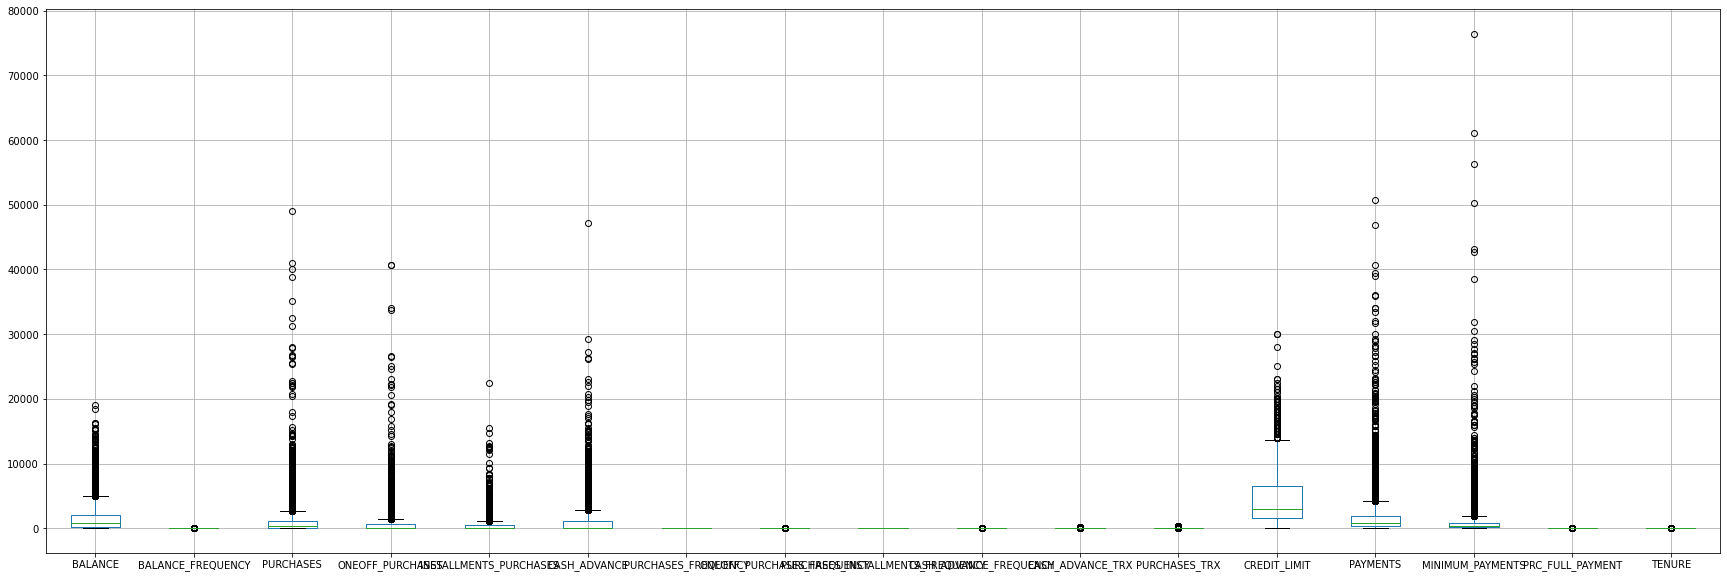

In [11]:
credit.boxplot(figsize= [30,10])
plt.show()

<AxesSubplot:>

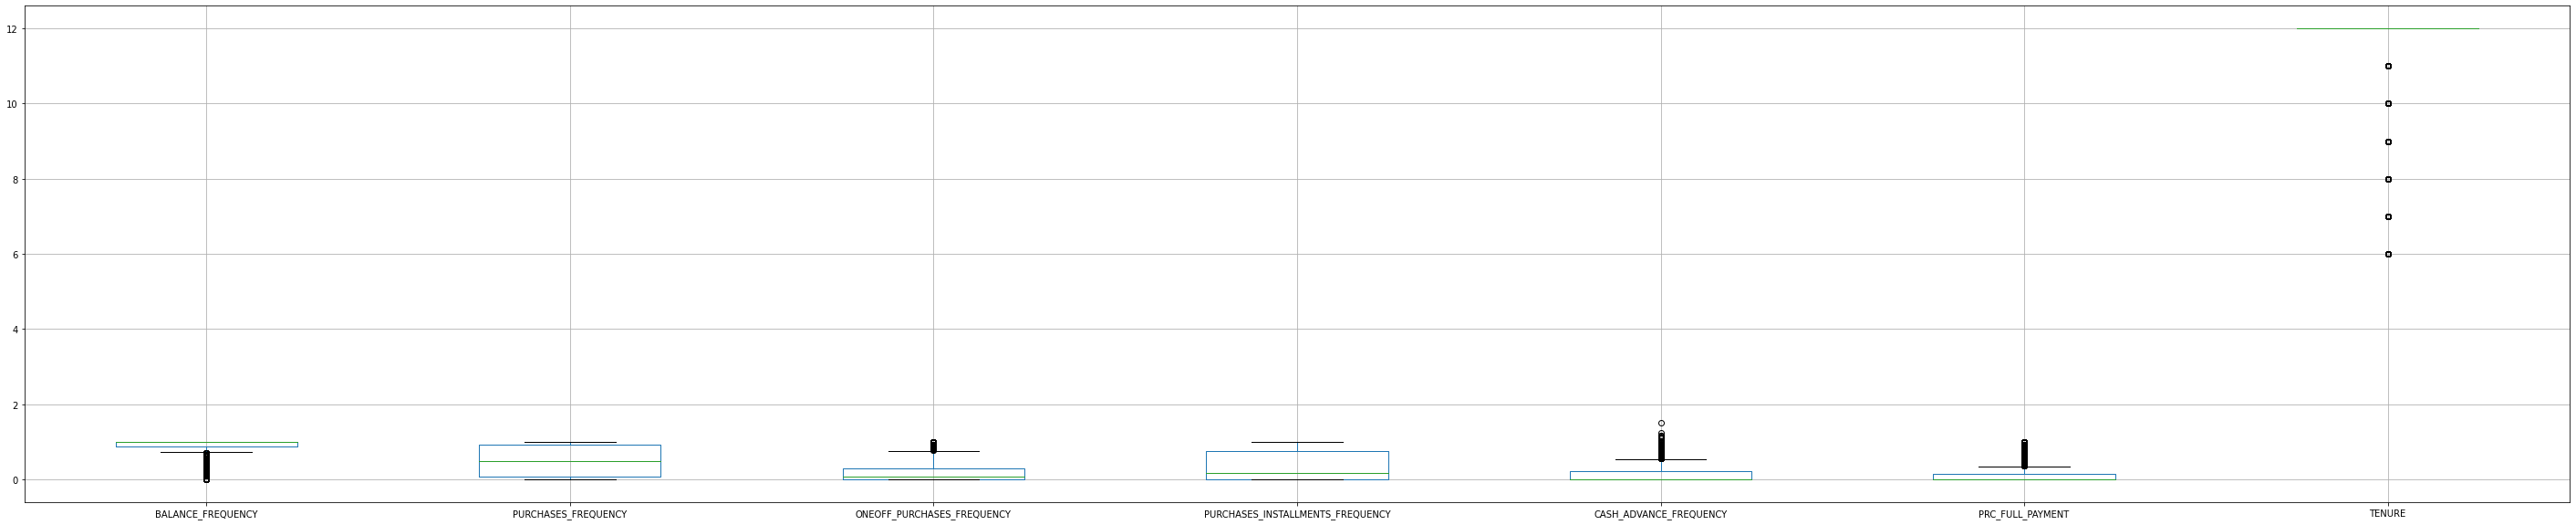

In [13]:
credit.drop(['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX', 'MINIMUM_PAYMENTS'], axis=1).boxplot(figsize= [50,10])

In [15]:
from scipy.stats import zscore
credit['zscore1'] = (credit.CASH_ADVANCE-credit.CASH_ADVANCE.mean())/credit.CASH_ADVANCE.std()
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759


In [16]:
credit[credit['zscore1']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1


In [17]:
creditcard=credit[(credit.zscore1>-3)&(credit.zscore1<3)]

In [20]:
creditcard['zscore2']=(creditcard.PURCHASES-creditcard.PURCHASES.mean())/creditcard.PURCHASES.std()
creditcard.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_11112/2875621814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creditcard['zscore2']=(creditcard.PURCHASES-creditcard.PURCHASES.mean())/creditcard.PURCHASES.std()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


In [21]:
creditcard[creditcard['zscore2']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,-0.466759,5.380597
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,-0.466759,9.863385
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12,0.698836,4.126864
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12,0.306039,4.328347
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12,-0.466759,4.622810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12,-0.049251,4.964860
7378,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,-0.230001,5.160985
7553,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12,-0.466759,5.174911
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,-0.466759,3.383858


In [22]:
creditcard[creditcard['zscore2']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2


In [24]:
creditcard=creditcard[(creditcard.zscore2>-3)&(creditcard.zscore2<3)]
creditcard.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


<h3>DEAL WITH CORRELATED VARIABLES</h3>

In [25]:
correlation=creditcard.corr()
correlation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
BALANCE,1.000000,0.330235,0.113048,0.113233,0.054510,0.506549,-0.091860,0.057981,-0.078306,0.434583,0.374002,0.105158,0.486152,0.251988,0.370143,-0.333967,0.083205,0.506549,0.113048
BALANCE_FREQUENCY,0.330235,1.000000,0.179192,0.135718,0.149591,0.108386,0.229482,0.198327,0.174689,0.190031,0.144872,0.202031,0.081352,0.050751,0.115819,-0.100518,0.118538,0.108386,0.179192
PURCHASES,0.113048,0.179192,1.000000,0.862500,0.684287,-0.130420,0.547472,0.619651,0.427354,-0.171325,-0.114478,0.730493,0.317229,0.412531,0.036630,0.194010,0.109471,-0.130420,1.000000
ONEOFF_PURCHASES,0.113233,0.135718,0.862500,1.000000,0.221265,-0.085490,0.345474,0.697550,0.124605,-0.107494,-0.072112,0.544201,0.295425,0.360160,-0.008351,0.115116,0.075905,-0.085490,0.862500
INSTALLMENTS_PURCHASES,0.054510,0.149591,0.684287,0.221265,1.000000,-0.128266,0.556997,0.188924,0.643692,-0.175305,-0.116775,0.623577,0.185565,0.276044,0.082447,0.207951,0.101542,-0.128266,0.684287
CASH_ADVANCE,0.506549,0.108386,-0.130420,-0.085490,-0.128266,1.000000,-0.272199,-0.110586,-0.226847,0.689780,0.658455,-0.126362,0.247018,0.315624,0.128465,-0.203937,-0.083854,1.000000,-0.130420
PURCHASES_FREQUENCY,-0.091860,0.229482,0.547472,0.345474,0.556997,-0.272199,1.000000,0.486095,0.862344,-0.311914,-0.222648,0.619908,0.113578,0.097669,-0.009092,0.301563,0.055551,-0.272199,0.547472
ONEOFF_PURCHASES_FREQUENCY,0.057981,0.198327,0.619651,0.697550,0.188924,-0.110586,0.486095,1.000000,0.115044,-0.107809,-0.074171,0.547826,0.278518,0.222537,-0.041803,0.137427,0.076534,-0.110586,0.619651
PURCHASES_INSTALLMENTS_FREQUENCY,-0.078306,0.174689,0.427354,0.124605,0.643692,-0.226847,0.862344,0.115044,1.000000,-0.267194,-0.187054,0.570827,0.046994,0.074806,0.020767,0.246289,0.067850,-0.226847,0.427354
CASH_ADVANCE_FREQUENCY,0.434583,0.190031,-0.171325,-0.107494,-0.175305,0.689780,-0.311914,-0.107809,-0.267194,1.000000,0.822662,-0.150617,0.093578,0.147825,0.088675,-0.253311,-0.134657,0.689780,-0.171325


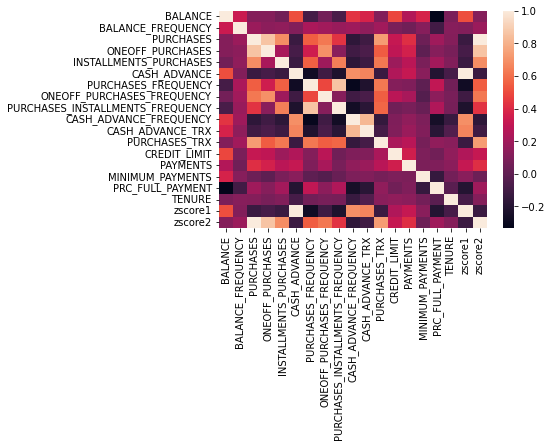

In [26]:
sns.heatmap(correlation)
plt.show()

<h3>PCA REDUCTION DIMENSIONALITY</h3>

In [27]:
numericalvar=creditcard.select_dtypes(include=[np.number])
creditnum= numericalvar.drop('TENURE',axis=1)
creditnum.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,-0.466759,-0.463328


In [29]:
creditnum.shape

(8636, 18)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(creditnum)
scaled_data=scaler.transform(creditnum)
print(scaled_data)

[[-0.73266711 -0.23380085 -0.60997863 ... -0.52219597 -0.56877272
  -0.60997863]
 [ 0.92083437  0.1454145  -0.69052051 ...  0.24091211  4.1599222
  -0.69052051]
 [ 0.5509063   0.52462985 -0.03776823 ... -0.52219597 -0.56877272
  -0.03776823]
 ...
 [-0.7418207  -0.17060038 -0.56861016 ...  0.33630148 -0.56877272
  -0.56861016]
 [-0.74701991 -0.17060038 -0.69052051 ...  0.33630148 -0.541941
  -0.69052051]
 [-0.55913165 -0.86582644  0.23246077 ... -0.52219597 -0.47553377
   0.23246077]]


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11, random_state=0)
PrincipalComponents = pca.fit_transform(scaled_data)

In [36]:
variance=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
print(variance)

[31.4 53.6 62.3 69.4 75.5 80.2 84.4 88.  91.1 93.6 95.6]


<h3>FIND OPTIMUM VALUE FOR K USING K-MEANS CLUSTERING AND ELBOW METHOD</h3>

In [38]:
cov_mat=np.cov(scaled_data.T)

In [39]:
print(cov_mat)

[[ 1.00011581  0.33027315  0.11306074  0.1132461   0.05451607  0.50660739
  -0.09187064  0.05798732 -0.07831485  0.43463295  0.37404505  0.10517045
   0.48620814  0.252017    0.37018626 -0.33400528  0.50660739  0.11306074]
 [ 0.33027315  1.00011581  0.1792129   0.13573326  0.1496087   0.10839832
   0.22950864  0.19834948  0.17470953  0.19005281  0.14488912  0.20205414
   0.08136138  0.05075707  0.1158325  -0.10052938  0.10839832  0.1792129 ]
 [ 0.11306074  0.1792129   1.00011581  0.86259997  0.68436645 -0.13043548
   0.54753521  0.61972248  0.42740388 -0.17134531 -0.11449118  0.73057797
   0.31726588  0.41257881  0.03663394  0.19403207 -0.13043548  1.00011581]
 [ 0.1132461   0.13573326  0.86259997  1.00011581  0.22129035 -0.08549995
   0.34551447  0.6976305   0.12461907 -0.10750673 -0.07212027  0.544264
   0.2954592   0.36020217 -0.00835211  0.11512979 -0.08549995  0.86259997]
 [ 0.05451607  0.1496087   0.68436645  0.22129035  1.00011581 -0.12828116
   0.55706103  0.18894556  0.6437667

In [41]:
eig_value,eig_vector=np.linalg.eig(cov_mat)
print('Eigenvalues:','\n','\n', eig_value,"\n")
print('Eigenvectors:','\n','\n', eig_vector,"\n")

Eigenvalues: 
 
 [5.65958265e+00+0.00000000e+00j 4.00231807e+00+0.00000000e+00j
 1.57047236e+00+0.00000000e+00j 1.28159189e+00+0.00000000e+00j
 1.10179590e+00+0.00000000e+00j 8.53152823e-01+0.00000000e+00j
 7.50108683e-01+0.00000000e+00j 6.56261076e-01+0.00000000e+00j
 5.61013409e-01+0.00000000e+00j 4.53552649e-01+0.00000000e+00j
 3.52008718e-01+0.00000000e+00j 2.99502717e-01+0.00000000e+00j
 2.53819051e-01+0.00000000e+00j 1.64166388e-01+0.00000000e+00j
 4.26856596e-02+0.00000000e+00j 5.24995966e-05+0.00000000e+00j
 1.78773851e-17+4.93135835e-17j 1.78773851e-17-4.93135835e-17j] 

Eigenvectors: 
 
 [[-1.48754178e-02+0.00000000e+00j  3.69625541e-01+0.00000000e+00j
  -7.47229306e-02+0.00000000e+00j  3.71989908e-01+0.00000000e+00j
   1.79118683e-01+0.00000000e+00j -2.06385667e-01+0.00000000e+00j
   1.28785753e-01+0.00000000e+00j -2.51738831e-02+0.00000000e+00j
  -1.21831413e-01+0.00000000e+00j -3.74022813e-02+0.00000000e+00j
   7.80678248e-02+0.00000000e+00j  6.24611030e-01+0.00000000e+00j

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


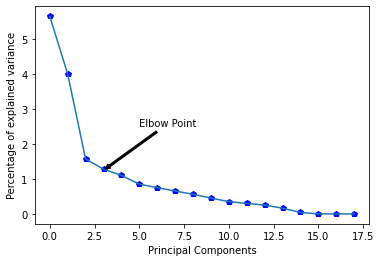

In [52]:
plt.plot(eig_value,"bp")
plt.xlabel('Principal Components')
plt.ylabel('Percentage of explained variance')
plt.annotate('Elbow Point', xy=(3,1.25), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))
plt.plot(eig_value) 

<h3>FIND THE OPTIMUM VALUE FOR K USING SILHOUETTE METHOD</h3>

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]

for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_num_std)
    score = silhouette_score(df_num_std, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.31719510446071086)
For n_clusters = 3, silhouette score is 0.28519474571532843)
For n_clusters = 4, silhouette score is 0.20588239650583237)
For n_clusters = 5, silhouette score is 0.2023247327206029)
For n_clusters = 6, silhouette score is 0.2138227139141098)
For n_clusters = 7, silhouette score is 0.21931749262847514)
For n_clusters = 8, silhouette score is 0.2223907276453778)
For n_clusters = 9, silhouette score is 0.19827762807074018)
For n_clusters = 10, silhouette score is 0.1910549563449926)


In [62]:
model = KMeans(n_clusters= 2, random_state= 10)
model.fit(df_num_std)

KMeans(n_clusters=2, random_state=10)

In [64]:
creditfinal=creditcard.copy(deep=True)
creditfinal['Cluster']=model.labels_
creditfinal.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633,0.232979,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328,0


In [65]:
np.unique(model.labels_, return_counts=True)

(array([0, 1]), array([6930, 1706], dtype=int64))

<AxesSubplot:xlabel='Cluster', ylabel='count'>

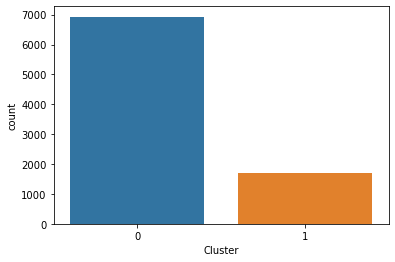

In [66]:
sns.countplot(data=creditfinal,x='Cluster')